# Carros usados no Ebay

O conjunto de dados é referente a anúncios de vendas de carros usados na Alemanha pela plataforma Ebay em 2016 e está disponível para acesso em: https://data.world/data-society/used-cars-data. 

O objetivo desse projeto é fazer limpeza nos dados e apresentar informações estatísticas sobre a distribuição dos dados.




## Conhecendo o conjunto de dados

In [1]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando o conjunto de dados em um dataframe e mostrando as informações
df = pd.read_csv('autos.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

Observamos que este conjunto de dados possui mais de 370 mil registros e 20 atributos que significam:
* `dateCrawled`: quando este anúncio foi rastreado pela primeira vez
* `name`: nome do carro
* `seller`: tipo de vendedor (privado ou comercial)
* `offerType`: tipo de oferta
* `price`: preço do veículo
* `abtest`: se a listagem está incluída em um teste A/B
* `vehicleType`: tipo do veículo
* `yearOfRegistration`: ano de registro
* `gearbox`: cambio
* `powerPS`: potência
* `model`: modelo
* `kilometer`: quilometragem percorrida
* `monthOfRegistration`: mês de registro
* `fuelType`: tipo de combustível
* `brand`: marca 
* `notRepairedDamage`: Dano não reparado
* `dateCreated`: A data em que a listagem do eBay foi criada
* `nrOfPictures`: Número de imagens no anúncio
* `postalCode`: Código postal do anúncio
* `lastSeen`: Última vizualização do anúncio

## Tratamento inicial dos dados

Nesta etapa, vamos realizar uma limpeza nos dados, incluindo tratamento dos registros nulos e duplicados, padronização dos nomes e tipos dos atributos.

### Atributos

Vamos padronizar os nomes dos atributos para facilitar a utilização durante o projeto e converter os dados para o tipo correto e eliminar os atributos que não são relevantes para este estudo.

In [3]:
#Mudando os nomes das colunas
df.rename(columns={'dateCrawled': 'ad_crawler', 'offerType':'offer_type','vehicleType': 'vehicle_type',\
                   'yearOfRegistration':'registration_year', 'monthOfRegistration': 'registration_month',\
                   'fuelType': 'fuel_type', 'notRepairedDamage':'unrepaired_damage',\
                   'dateCreated': 'date_create', 'nrOfPictures' : 'num_of_pictures',\
                   'postalCode':'postal_code', 'lastSeen':'last_seen'}, inplace = True)

In [4]:
#Convertando os dados para o tipo data
df['ad_crawler'] = pd.to_datetime(df['ad_crawler'])
df['date_create'] = pd.to_datetime(df['date_create'])
df['last_seen'] = pd.to_datetime(df['last_seen'])

df.head(3)

,ad_crawler,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,date_create,num_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46


In [5]:
#Descrição dos atributos categóricos
df.describe(include = np.object0)

,name,seller,offer_type,abtest,vehicle_type,gearbox,model,fuel_type,brand,unrepaired_damage
count,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468
unique,233528,2,2,2,8,2,251,7,40,2
top,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein
freq,657,371525,371516,192585,95894,274214,30070,223857,79640,263182


Observamos que os atributos `seller`, `offer_type` e `abtest` possuem apenas dois tipos únicos e não interferem na tomada de decisão do projeto. Vamos, assim, retirar essas colunas.

In [6]:
del df['seller']
del df['offer_type']
del df['abtest']

### Registros

Nesta etapa, vamos tratar os registros nulos e duplicados, caso existam.

In [7]:
#Verificando a quantidade de elementos nulos por atributo
df.isnull().sum()

ad_crawler                0
name                      0
price                     0
vehicle_type          37869
registration_year         0
gearbox               20209
powerPS                   0
model                 20484
kilometer                 0
registration_month        0
fuel_type             33386
brand                     0
unrepaired_damage     72060
date_create               0
num_of_pictures           0
postal_code               0
last_seen                 0
dtype: int64

Nos registros nulos dos atributos `vehicle_type`, `gearbox`, `model`, `fuel_type`, `unrepaired_damage` iremos inserir a informação "uninformed".

In [8]:
df['vehicle_type'].fillna('uninformed',inplace = True)
df['gearbox'].fillna('uninformed',inplace = True)
df['model'].fillna('uninformed',inplace = True)
df['fuel_type'].fillna('uninformed',inplace = True)
df['unrepaired_damage'].fillna('uninformed',inplace = True)

In [9]:
#Verificando registros duplicados
df.duplicated().sum()

4

In [10]:
#Eliminando os registros duplicados
df = df.drop_duplicates()

## Limpeza nos dados

Nesta etapa vamos obter algumas medidas estatísticas para conhecer mais profundamente nosso conjunto de dados e fazer a limpeza de dados mais precisa, tratando valores não concistentes e discrepantes.

### Ano de registro

In [11]:
#Informações descritivas sobre o ano de registro dos veículos
df['registration_year'].describe()

count    371524.000000
mean       2004.578033
std          92.867097
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

Observamos que há registros informando valores não irreais do ano de registro. Neste caso, vamos eliminar todos os registros que informarem ano de registro superior a 2016 e inferiores a 1940.

In [12]:
df = df[df['registration_year'] <=2016]
df = df[df['registration_year'] >=1940]

### Preços dos veículos

In [13]:
#Informações descritivas sobre o ano de registro dos veículos
df['price'].describe()

count    3.565900e+05
mean     1.739885e+04
std      3.658225e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.999000e+03
75%      7.400000e+03
max      2.147484e+09
Name: price, dtype: float64

Observamos que há veículos com valores de venda discrepantes (outliers). Neste caso, vamos eliminar esses registros. 

In [14]:
#Determinar os limites inferiores e superiores
Q1 = np.percentile(df['price'],25)
Q3 = np.percentile(df['price'],75)
AIQ = Q3 - Q1
LI = Q1 - 1.5 * AIQ 
LS = Q3 + 1.5 * AIQ

#Eliminando os outliers
df = df[df['price'] >= LI]
df = df[df['price'] <= LS]

### Quilometragem

In [15]:
#Informações descritivas sobre o ano de registro dos veículos
df['kilometer'].describe()

count    330315.000000
mean     129210.647412
std       36981.824748
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

Não iremos fazer nenhuma alterção nos registros da coluna `kilometer` pois não há valores irreais. Observe que não há carros com quilometragem zero, pois trata-se de uma lista de carros usados e o valor máximo da quilometragem é 150 mil.

## Análise exploratória dos dados

Nesta seção, vamos explorar o conjunto de dados, afim de obter informações relevantes sobre os veículos anunciados.

### Distribuição dos carros por ano de registro

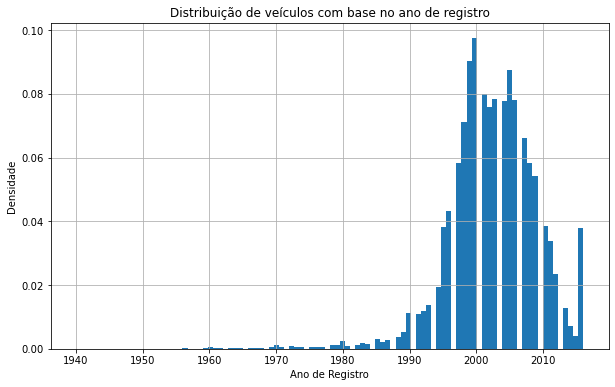

In [16]:
#Distribuição dos carros por ano.
plt.figure(figsize=(10,6))

plt.hist(x=df['registration_year'], bins = 100,density=True)
plt.xlabel('Ano de Registro')
plt.ylabel("Densidade")
plt.title("Distribuição de veículos com base no ano de registro")
plt.grid()
plt.show()

### Variação dos preços dos carros por tipo

In [17]:
#Padronizando os registros do tipo de veiculo para minusculo
df['vehicle_type'] = df['vehicle_type'].str.lower().values

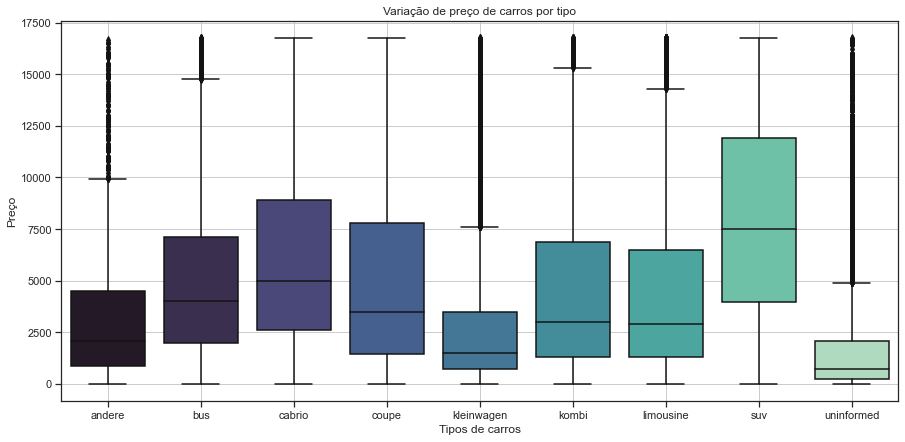

In [18]:
plt.figure(figsize=(15,7))

sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x=df['vehicle_type'].sort_values(), y=df['price'], palette='mako')

plt.xlabel('Tipos de carros')
plt.ylabel('Preço')

plt.grid()

plt.title("Variação de preço de carros por tipo")
plt.show()

### Número de vendas conforme o tipo veículo

In [19]:
#Criando um novo dataframe
df2 = pd.DataFrame()

In [20]:
#Listando os tipos unicos de veiculos e guardo no dataframe
tipos = df['vehicle_type'].unique()
df2['tipos'] = tipos

In [21]:
#Somando os preços por tipo
soma = []
for tipo in tipos:
    soma.append(df[df['vehicle_type'] == tipo]['price'].sum())

df2['preco'] = soma

In [22]:
#Inserindo a variável porcentagem
df2['porcentagem'] = df2['preco']/sum(df2['preco']) * 100
df2.head(3)

,tipos,preco,porcentagem
0,uninformed,40998539,3.041339
1,suv,84745461,6.286557
2,kleinwagen,208195734,15.444300


In [23]:
#Ordenando o dataframe
df2.sort_values(by=['porcentagem'], ascending=False, inplace=True)
df2.head(3)

,tipos,preco,porcentagem
3,limousine,385163493,28.572058
6,kombi,285489536,21.178081
2,kleinwagen,208195734,15.444300


C:\Users\fmllo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


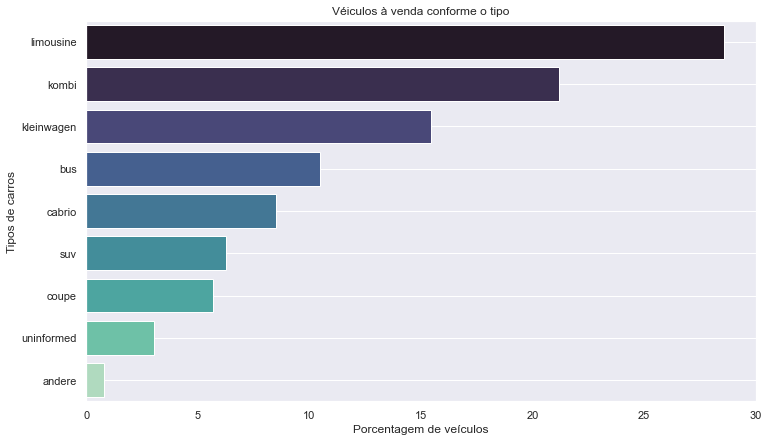

In [24]:
#Plotando o gráfico

plt.figure(figsize=(12,7))

x = list(df2['tipos'])
y = list(df2['porcentagem'])

sns.set_style('darkgrid')
sns.barplot(y,x, orient='h',palette="mako")

plt.grid()
plt.ylabel('Tipos de carros')
plt.xlabel('Porcentagem de veículos')

plt.title('Véiculos à venda conforme o tipo')

plt.show()

### Número de veículos por marca

In [25]:
#Criando um novo dataframe
df3 = pd.DataFrame()

In [26]:
#Somando a quantidade de carros por marca e add em um df
df3 = df['brand'].value_counts().to_frame()

# mudando o nome das colunas
df3 = df3.reset_index()
df3.columns = ['marcas', 'quantidade'] 
df3.head(3)

,marcas,quantidade
0,volkswagen,71254
1,opel,37723
2,bmw,34114


C:\Users\fmllo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


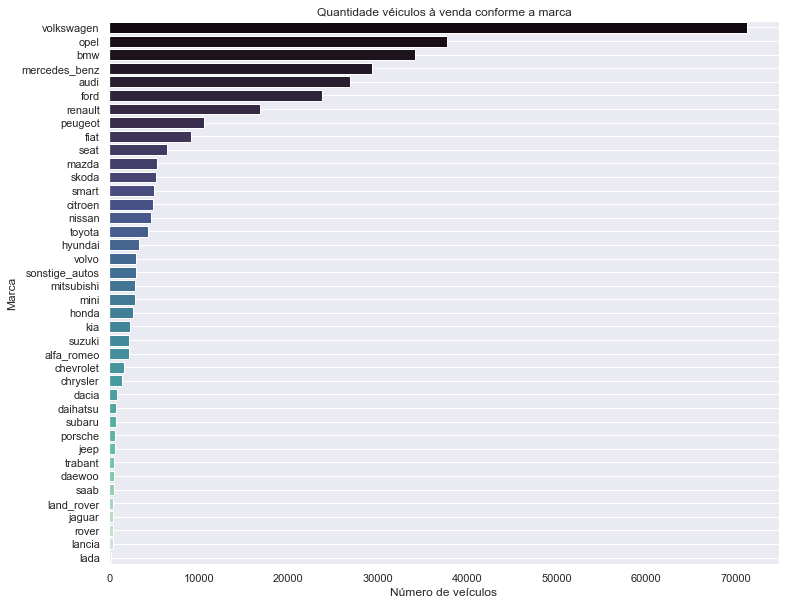

In [27]:
#Plotando o gráfico

plt.figure(figsize=(12,10))

x = df3['quantidade']
y = df3['marcas']

sns.set_style('darkgrid')
sns.barplot(x,y,palette="mako")

plt.grid()
plt.ylabel('Marca')
plt.xlabel('Número de veículos')

plt.title('Quantidade véiculos à venda conforme a marca')

plt.show()

### Preço médio dos veículos com base no tipo de veículo e no tipo de cambio

In [28]:
#determinando os tipos únicos de cambio
df['gearbox'].unique()

array(['manuell', 'automatik', 'uninformed'], dtype=object)

In [29]:
#padronizando as strings para minusculo
df['gearbox'] = df['gearbox'].str.lower().values

In [30]:
#Filrando os cambios
dfmanual = df[ df['gearbox'] == 'manuell']
dfauto = df[ df['gearbox'] == 'automatik']
dfnaoesp = df[ df['gearbox'] == 'uninformed']

In [31]:
#Agrupando os dfs por tipos de veiculos e inserindo a média de preço
serie1 = dfmanual.groupby('vehicle_type')['price'].mean()
serie2 = dfauto.groupby('vehicle_type')['price'].mean()
serie3 = dfnaoesp.groupby('vehicle_type')['price'].mean()

In [ ]:
#Criando o df final
df4 = pd.DataFrame()
df4['tipo']=serie1.index
df4['media_preco_man'] = serie1.values
df4['media_preco_aut'] = serie2.values
df4['media_preco_noesp'] = serie3.values

df4.head()

In [32]:
#Exibindo os gráficos

plt.figure(figsize = (12, 8))

barWidth = 0.25
labels = list(df4['tipo'])

# Set position of bar on X axis
br1 = np.arange(len(labels))
br2 = br1 + barWidth
br3 = br2 + barWidth

# Make the plot
plt.bar(br1, df4['media_preco_man'], width=barWidth, label='Manual', color='r')
plt.bar(br2, df4['media_preco_aut'], width=barWidth, label='Automático', color='g')
plt.bar(br3, df4['media_preco_noesp'], width=barWidth, label='Não especificado', color ='b')

# Adding Xticks
#plt.xlabel('Tipos', fontweight ='bold', fontsize = 15)
plt.xticks(br1 + barWidth, labels)
plt.title('Preço médio de veículos por tipo e por cambio')

plt.legend()
plt.show()

NameError: name 'df4' is not defined

<Figure size 864x576 with 0 Axes>

### Preço médio do veículo por tipo de combustível e caixa de cambio.

In [33]:
#Agrupando os dfs por tipos de veiculos e inserindo a média de preço
serie1 = dfmanual.groupby('fuel_type')['price'].mean()
serie2 = dfauto.groupby('fuel_type')['price'].mean()
serie3 = dfnaoesp.groupby('fuel_type')['price'].mean()

In [34]:
#Criando o df final
df5 = pd.DataFrame()
df5['tipo']=serie1.index
df5['media_preco_man'] = serie1.values
df5['media_preco_aut'] = serie2.values
df5['media_preco_noesp'] = serie3.values

df5.head()

,tipo,media_preco_man,media_preco_aut,media_preco_noesp
0,andere,2101.663793,3114.481481,1396.375000
1,benzin,3270.894897,5022.272433,2080.398237
2,cng,4462.376518,5680.714286,2646.307692
3,diesel,5474.422238,7707.807133,3463.913610
4,elektro,3384.615385,6911.600000,3778.090909


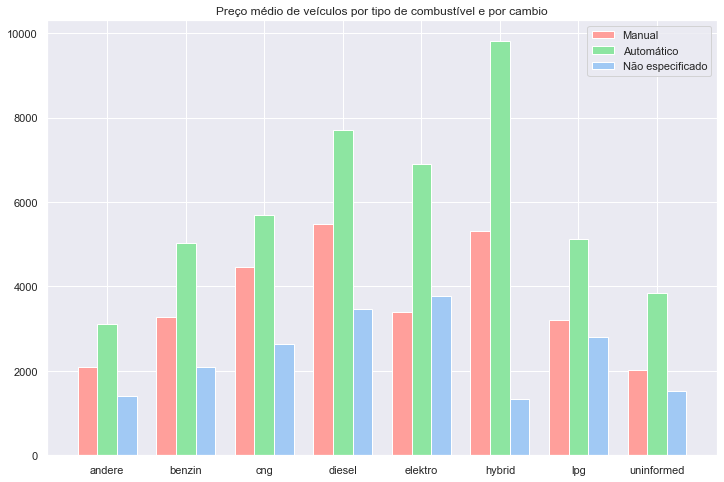

In [35]:
#Exibindo os gráficos

plt.figure(figsize = (12, 8))

barWidth = 0.25
labels = list(df5['tipo'])

# Set position of bar on X axis
br1 = np.arange(len(labels))
br2 = br1 + barWidth
br3 = br2 + barWidth

# Make the plot
plt.bar(br1, df5['media_preco_man'], width=barWidth, label='Manual', color='r')
plt.bar(br2, df5['media_preco_aut'], width=barWidth, label='Automático', color='g')
plt.bar(br3, df5['media_preco_noesp'], width=barWidth, label='Não especificado', color ='b')

# Adding Xticks
#plt.xlabel('Tipos', fontweight ='bold', fontsize = 15)
plt.xticks(br1 + barWidth, labels)
plt.title('Preço médio de veículos por tipo de combustível e por cambio')

plt.legend()
plt.show()